In [1]:
#imports
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from math import log

In [2]:
#Functii ajutatoare

def mysort(cols):
    def sort_key(col):
        # Find the position of the first digit after 'Q'
        pos = 1
        while pos < len(col) and not col[pos].isdigit():
            pos += 1

        # Extract the number and suffix
        number = ''
        while pos < len(col) and col[pos].isdigit():
            number += col[pos]
            pos += 1

        suffix = col[pos:]

        # Convert number to integer for sorting
        number = int(number) if number else float('inf')

        return (number, suffix)

    return [cols[0]] + sorted(cols[1:], key=sort_key)

def calc_medie(source):
    medie = 0
    vcm = source['Q4'].value_counts()
    preferNot = 0
    display(vcm)
    if 'Doctoral degree' in vcm :
        medie += 8 * vcm['Doctoral degree']
    if 'Professional doctorate' in vcm  :
        medie += 8 * vcm['Professional doctorate']
    if 'Bachelor’s degree' in vcm :
        medie += 3 * vcm['Bachelor’s degree']
    if 'Master’s degree' in vcm:
        medie += 5 * vcm['Master’s degree']
    if 'I prefer not to answer' in vcm:
        preferNot = vcm['I prefer not to answer']

    return medie / (source.shape[0] - preferNot)

In [3]:
#Datatele sunt citite din read_csv
#Grupare coloanelor cu raspuns multiplu

data = pd.read_csv('surveyDataSience.csv')
columns = data.columns

new_columns = []
dim_columns = len(columns)

i=0
while i < dim_columns:
    if 'Part_' in columns[i]:

        first_value = i
        new_column = str(columns[i])[0:columns[i].find('_')]

        if new_column in data.columns:
            data.rename(columns={new_column : new_column + '_A'}, inplace=True)
            new_column = new_column + '_B'

        print("Lucrul pe coloana:" + str(columns[i]))

        while 'Part_' in columns[i] and i < dim_columns:
           i+=1

        #combin coloanele dupa le sterg ( dropna remove : NaN values , astype(str) convert to string)
        data[new_column] = data[columns[first_value:i]].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)

        removeEmpty = []
        for col in data[new_column]:
            if col == '':
                removeEmpty.append(None)
            else:
                removeEmpty.append(col)

        data[new_column] = removeEmpty
        new_columns.append(new_column)

        data.drop(columns[first_value:i+1], inplace=True,axis = 1)

    i += 1

#ordonare dupa coloane
data = data.reindex(mysort(data.columns), axis=1)
print(data.columns)
#(data)


<ipython-input-3-786d080dfd21>:4: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('surveyDataSience.csv')


Lucrul pe coloana:Q7_Part_1
Lucrul pe coloana:Q9_Part_1
Lucrul pe coloana:Q10_Part_1
Lucrul pe coloana:Q12_Part_1
Lucrul pe coloana:Q14_Part_1
Lucrul pe coloana:Q16_Part_1
Lucrul pe coloana:Q17_Part_1
Lucrul pe coloana:Q18_Part_1
Lucrul pe coloana:Q19_Part_1
Lucrul pe coloana:Q24_Part_1
Lucrul pe coloana:Q27_A_Part_1
Lucrul pe coloana:Q29_A_Part_1
Lucrul pe coloana:Q30_A_Part_1
Lucrul pe coloana:Q31_A_Part_1
Lucrul pe coloana:Q32_A_Part_1
Lucrul pe coloana:Q34_A_Part_1
Lucrul pe coloana:Q36_A_Part_1
Lucrul pe coloana:Q37_A_Part_1
Lucrul pe coloana:Q38_A_Part_1
Lucrul pe coloana:Q39_Part_1
Lucrul pe coloana:Q40_Part_1
Lucrul pe coloana:Q42_Part_1
Lucrul pe coloana:Q27_B_Part_1
Lucrul pe coloana:Q29_B_Part_1
Lucrul pe coloana:Q30_B_Part_1
Lucrul pe coloana:Q31_B_Part_1
Lucrul pe coloana:Q32_B_Part_1
Lucrul pe coloana:Q34_B_Part_1
Lucrul pe coloana:Q36_B_Part_1
Lucrul pe coloana:Q37_B_Part_1
Lucrul pe coloana:Q38_B_Part_1
Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4

In [4]:
display(data.iloc[91])

,91
Time from Start to Finish (seconds),50748
Q1,25-29
Q2,Woman
Q3,Argentina
Q4,Master’s degree
Q5,Data Scientist
Q6,< 1 years
Q7,Python|SQL
Q8,Python
Q9,Visual Studio Code (VSCode) | Jupyter Notebook


numarul de respondenti (de la care s-au colectate informatiile)

In [5]:

#-1 fiind o linie in plus
print(data.shape[0]-1)

25973



numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent

In [6]:
print("Numar de atribute :" + str(data.shape[1]))

for col in data.columns:
    print(col + " : " + str(type(data[col][1])))


Numar de atribute :52
Time from Start to Finish (seconds) : <class 'str'>
Q1 : <class 'str'>
Q2 : <class 'str'>
Q3 : <class 'str'>
Q4 : <class 'str'>
Q5 : <class 'str'>
Q6 : <class 'str'>
Q7 : <class 'str'>
Q8 : <class 'str'>
Q9 : <class 'str'>
Q10 : <class 'str'>
Q11 : <class 'str'>
Q12 : <class 'str'>
Q13 : <class 'str'>
Q14 : <class 'str'>
Q15 : <class 'str'>
Q16 : <class 'str'>
Q17 : <class 'str'>
Q18 : <class 'str'>
Q19 : <class 'str'>
Q20 : <class 'str'>
Q21 : <class 'str'>
Q22 : <class 'str'>
Q23 : <class 'str'>
Q24 : <class 'str'>
Q25 : <class 'str'>
Q26 : <class 'str'>
Q27_A : <class 'str'>
Q27_B : <class 'NoneType'>
Q28 : <class 'float'>
Q29_A : <class 'str'>
Q29_B : <class 'NoneType'>
Q30_A : <class 'str'>
Q30_B : <class 'NoneType'>
Q31_A : <class 'str'>
Q31_B : <class 'NoneType'>
Q32_A : <class 'str'>
Q32_B : <class 'NoneType'>
Q33 : <class 'float'>
Q34_A : <class 'NoneType'>
Q34_B : <class 'NoneType'>
Q35 : <class 'float'>
Q36_A : <class 'str'>
Q36_B : <class 'NoneType'>
Q


numar de respondenti cu date complete

In [7]:

contor = 0
for i in range(1,data.shape[0]):
    if not data.iloc[i].isnull().any() :
        print(i)
        contor +=1

print( "Numar total : " + str(contor))

Numar total : 0


durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), durata medie a anilor de studii pentru respondentii din Romania si durata medie a anilor de studii pentru respondentii din Romania care sunt femei. Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani

In [8]:
date = data[['Q2','Q3','Q4']][1:]

#Media generala
print("Durata medie a anilor de studii superioare pentru acesti respondenti : " + str(calc_medie(date)))
print("")

#Media din Romania
romania_date = date[date['Q3'] == 'Romania']

#Media femei din Romania
print("Durata medie a anilor de studii superioare pentru acesti respondenti din Romania : " + str(calc_medie(romania_date)))
print("")

femei_date = romania_date[date['Q2'] == 'Woman']

print("Durata medie a anilor de studii superioare pentru acesti respondenti din Romania care sunt femei : "
      + str(calc_medie(femei_date)))

,count
Q4,
Master’s degree,10132
Bachelor’s degree,9907
Doctoral degree,2795
Some college/university study without earning a bachelor’s degree,1735
I prefer not to answer,627
No formal education past high school,417
Professional doctorate,360


Durata medie a anilor de studii superioare pentru acesti respondenti : 4.167166416791604



,count
Q4,
Master’s degree,32
Bachelor’s degree,10
Doctoral degree,8
Some college/university study without earning a bachelor’s degree,5
Professional doctorate,3
No formal education past high school,2
I prefer not to answer,1


Durata medie a anilor de studii superioare pentru acesti respondenti din Romania : 4.633333333333334



<ipython-input-8-7715883fac00>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femei_date = romania_date[date['Q2'] == 'Woman']


,count
Q4,
Master’s degree,12
Doctoral degree,2
Some college/university study without earning a bachelor’s degree,1
Professional doctorate,1


Durata medie a anilor de studii superioare pentru acesti respondenti din Romania care sunt femei : 5.25


numarul de respondenti femei din Romania pentru care se detin date complete

In [9]:
contor = 0
for i in range(1,data.shape[0]):
    if not data.iloc[i].isnull().any() and data.loc[i]['Q2'] == 'Woman':
        print(i)
        contor +=1

print( "Numar total : " + str(contor))

Numar total : 0


numarul de femei din Romania care programeaza in Python, precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.

In [10]:
# Filter data for women in Romania
women_romania = data[(data['Q2'] == 'Woman') & (data['Q3'] == 'Romania')]

# Python
python_programmers = women_romania[women_romania['Q7'].str.contains('Python', na=False)]
print("Python programers : " + str(python_programmers.shape[0]))
print("Intervalul majoritate : " + str(python_programmers['Q1'].value_counts().idxmax()))

# C++
cpp_programmers = women_romania[women_romania['Q7'].str.contains('C++', na=False)]
print("C++ programers : " + str(cpp_programmers.shape[0]))
print("Intervalul majoritate : " + str(cpp_programmers['Q1'].value_counts().idxmax()))

Python programers : 12
Intervalul majoritate : 35-39
C++ programers : 4
Intervalul majoritate : 18-21


domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [11]:
print("Colonea : " + data.columns[0])
print("Domeniu valori : " + str(data[data.columns[0]][1:].unique()))
print("Valoarea minima : " + str(data[data.columns[0]][1:].astype(int).min()))
print("Valoarea maxima : " + str(data[data.columns[0]][1:].astype(int).max()))
print("=================================================")

print(new_columns)

for col in data.columns[1:]:
    if col in new_columns:
        ser = []
        for elem in data[col][1:]:
                elem = str(elem)
                ser.extend(elem.split('|'))
        ser = pd.Series(ser)

    else:
        ser = data[col][1:]

    print("Coloana : " + col)
    print("Valori unice : " + str(ser.nunique()))
    print("Domeniu de valoi si numar de fiecare:")
    print(ser.value_counts())
    print("\n=================================================\n")

Colonea : Time from Start to Finish (seconds)
Domeniu valori : ['910' '784' '924' ... 69978 96354 40250]
Valoarea minima : 120
Valoarea maxima : 2488653
['Q7', 'Q9', 'Q10', 'Q12', 'Q14', 'Q16', 'Q17', 'Q18', 'Q19', 'Q24', 'Q27', 'Q29', 'Q30', 'Q31', 'Q32', 'Q34', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q42', 'Q27_B', 'Q29_B', 'Q30_B', 'Q31_B', 'Q32_B', 'Q34_B', 'Q36_B', 'Q37_B', 'Q38_B']
Coloana : Q1
Valori unice : 11
Domeniu de valoi si numar de fiecare:
Q1
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: count, dtype: int64


Coloana : Q2
Valori unice : 5
Domeniu de valoi si numar de fiecare:
Q2
Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64


Coloana : Q3
Valori unice : 66
Domeniu de valoi si numar de fiecare:
Q3
India                  

transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). Ce se poate spune despre aceasta variabila?

In [12]:
domain_Q6 = {
    '< 1 years' : 0.5,
    '1-3 years' : 2,
    '3-5 years' : 4,
    '5-10 years' : 7.5,
    '10-20 years' : 15,
    '20+ years' : 20,
    'I have never written code' : 0
}

rolex = data['Q6'][1:].map(domain_Q6)

display(rolex.value_counts())

print("Minim : " + str(rolex.min()))
print("Maxim : " + str(rolex.max()))

lista = rolex.to_list()

print("Media : " + str(numpy.mean([x for x in lista])))
print("Deviatia standard : " + str(numpy.std([x for x in lista])))
print("Mediana : " + str(numpy.median([x for x in lista])))

,count
Q6,
2.0,7874
0.5,5881
4.0,4061
7.5,3099
15.0,2166
20.0,1860
0.0,1032


Minim : 0.0
Maxim : 20.0
Media : 4.922996958379856
Deviatia standard : 5.801328395681101
Mediana : 2.0


distributia respondentilor care programeaza in Python pe categorii de varsta

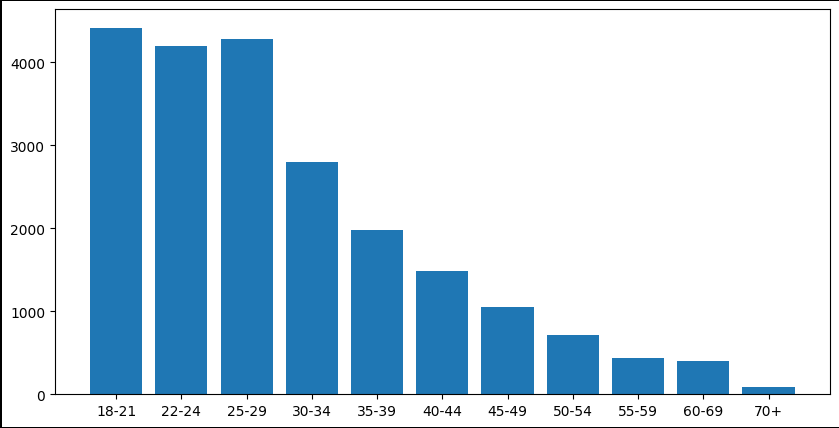

In [13]:

numbers = data['Q1'][ data['Q7'].str.contains('Python') == True][1:]
keys = numbers.value_counts().sort_index().keys()
values = numbers.value_counts().sort_index().values

plt.figure(figsize=(10, 5),edgecolor='black', linewidth=1)
plt.bar(keys, values)


plt.show()

distributia respondentilor din Romania care programeaza in Python pe categorii de varsta

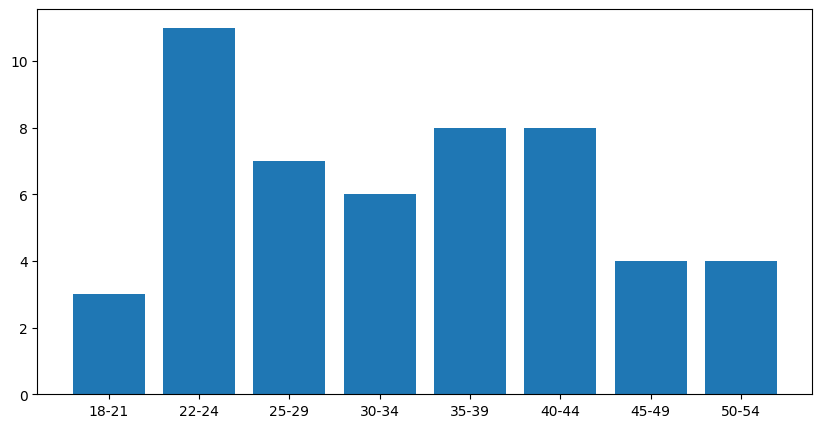

In [14]:
numbers = data['Q1'][(data['Q3'] == 'Romania') & (data['Q7'].str.contains('Python') == True)]
keys = numbers.value_counts().sort_index().keys()
values = numbers.value_counts().sort_index().values

plt.figure(figsize=(10, 5))
plt.bar(keys, values)

plt.show()


distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta

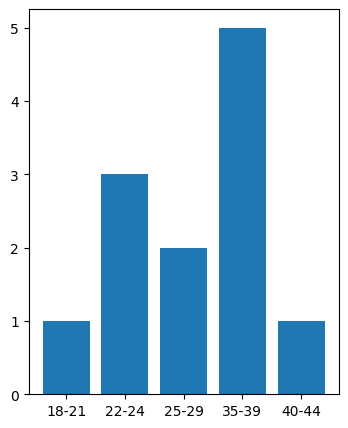

In [15]:
numbers = data['Q1'][(data['Q3'] == 'Romania') & (data['Q7'].str.contains('Python') == True) & (data['Q2'] == 'Woman')]
keys = numbers.value_counts().sort_index().keys()
values = numbers.value_counts().sort_index().values

plt.figure(figsize=(4, 5))
plt.bar(keys, values)

plt.show()

respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)

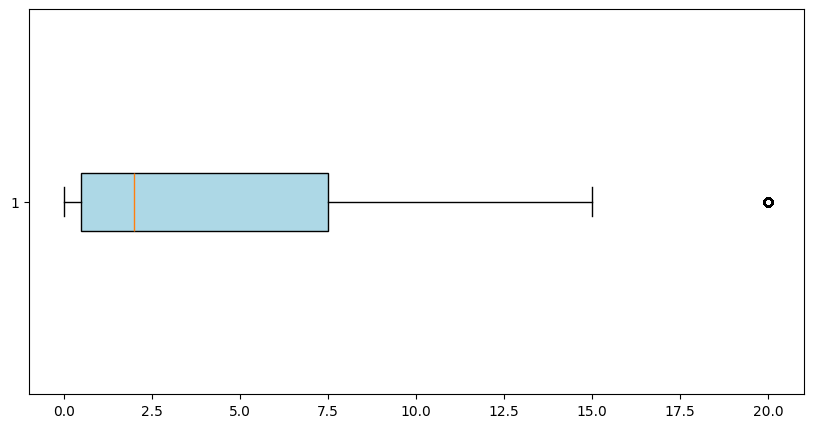

In [16]:
numbers = data['Q6'][1:].map(domain_Q6).astype(float)

plt.figure(figsize=(10, 5))
plt.boxplot(numbers, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.show()

**PROBLEMA 2**

2.Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

In [17]:
#imports
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from pathlib import Path
from numpy import mean

plt.style.use('fast')

sa se vizualizeze una din imagini

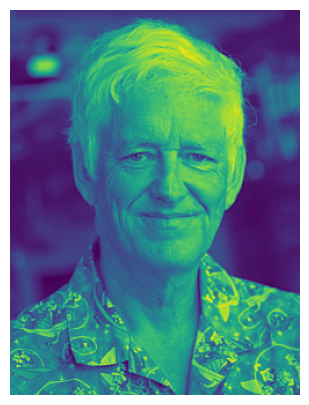

In [21]:
img = Image.open('images/Norvig.jpg')
fig1, ax  = plt.subplots(1,1,figsize=(5,5))

ax.imshow(img)
ax.axis('off')

plt.show()

daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

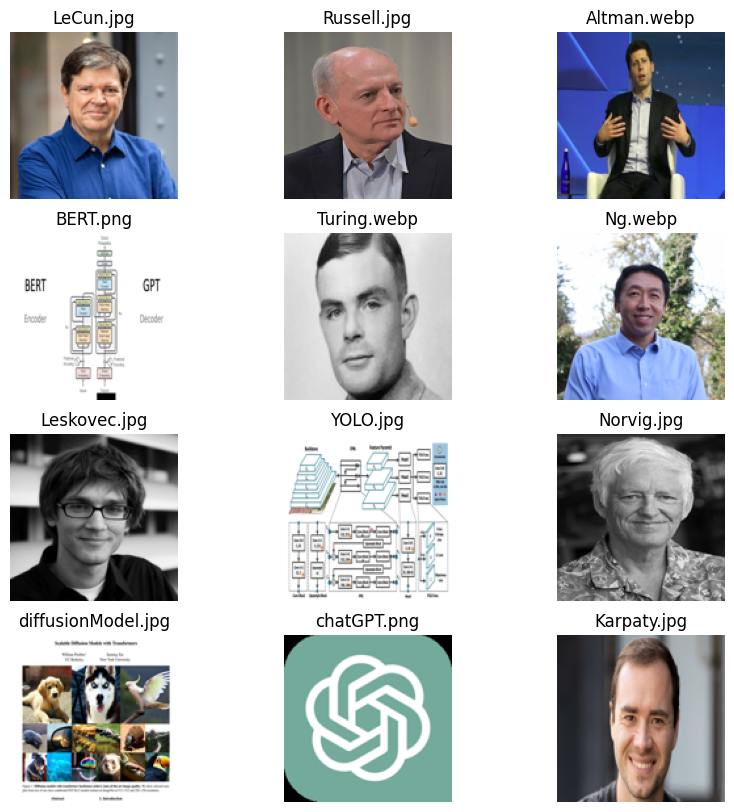

In [22]:
image_dir = Path('images')
image_files = [file for file in image_dir.iterdir()]
fig2, axes = plt.subplots(4,3,figsize=(10,10))

for i, ax in enumerate(axes.flat):
        img = Image.open(image_files[i]).convert('RGB')
        img = img.resize((128, 128))

        ax.set_title(image_files[i].name)
        ax.imshow(img)
        ax.axis('off')

plt.show()

sa se transforme imaginile in format gray-levels si sa se vizualizeze

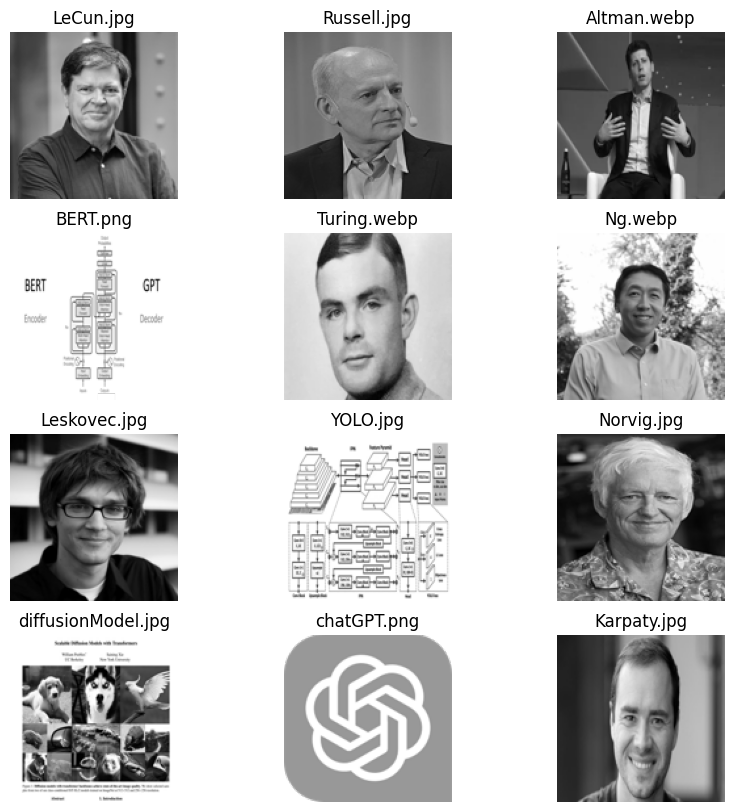

In [24]:
image_dir = Path('images')
image_files = [file for file in image_dir.iterdir()]
fig3, axes = plt.subplots(4,3,figsize=(10,10))

for i, ax in enumerate(axes.flat):
        img = Image.open(image_files[i]).convert('LA')
        img = img.resize((128, 128))

        ax.imshow(img)
        ax.set_title(image_files[i].name)
        ax.axis('off')

plt.show()

sa se blureze o imagine si sa se afiseze in format "before-after"

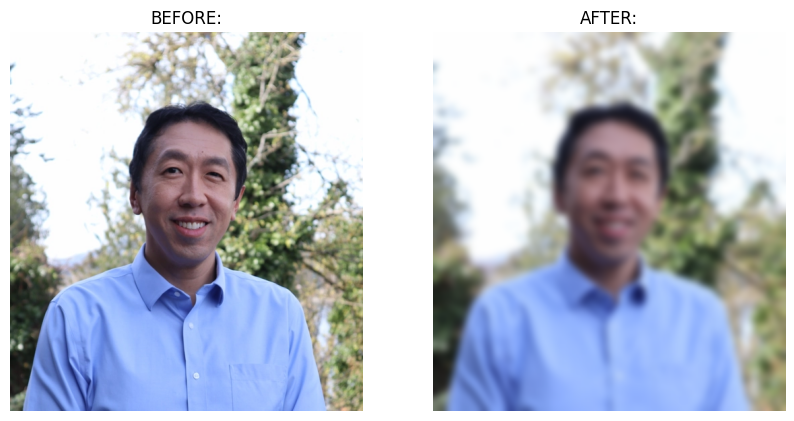

In [26]:
image = Image.open('images/Ng.webp')
fig4, axes = plt.subplots(1,2,figsize=(10,10))

axes[0].imshow(image)
axes[0].set_title('BEFORE:')
axes[0].axis('off')

bImg = image.filter(ImageFilter.GaussianBlur(5))
axes[1].imshow(bImg)
axes[1].set_title('AFTER:')
axes[1].axis('off')

plt.show()

sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after"

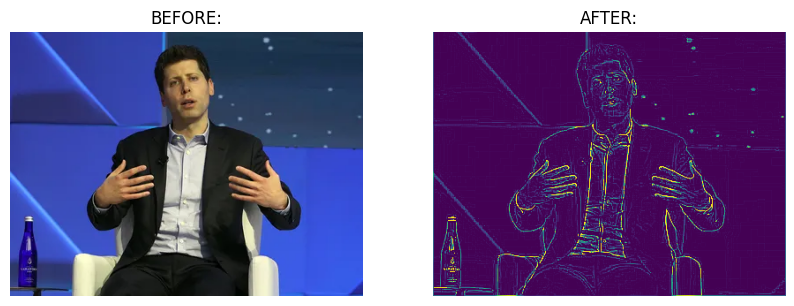

In [27]:
image = Image.open('images/Altman.webp')
fig5, axes = plt.subplots(1,2,figsize=(10,10))

axes[0].imshow(image)
axes[0].set_title('BEFORE:')
axes[0].axis('off')

bImg = image.convert('L').filter(ImageFilter.FIND_EDGES)
axes[1].imshow(bImg)
axes[1].set_title('AFTER:')
axes[1].axis('off')

plt.show()

PROBLEMA **3**

3. Se da un fisier care contine un text (format din mai multe propozitii) in limba romana - a se vedea fisierul ”data/texts.txt”. Se cere sa se determine si sa se vizualizeze:

In [28]:
#import-uri
import nltk
import matplotlib.pyplot as plt
import numpy
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
#citirea textului din fisier
f = open('texts.txt','r',encoding='utf-8')
raw=f.read()
print(raw)

Mesaj de informare: 
Cursul și laboratoarele de Inteligență Artificială vor fi o 
provocare pentru toți. Suntem convinși că veți realiza proiecte 
foarte interesante. Vă încurajăm să adresați întrebări atunci 
când ceva nu e clar, atât în mod live, cât și folosind platforma 
Teams, canalul ”general”. 
Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm că am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimați cursanți,
Suntem încântați să vă avem în echipa noastră pentru Cursul și 
laboratoarele de Inteligență Artificială. Această experiență va 
fi o adevărată provocare, dar suntem convinși că veți realiza 
proiecte extrem de interesante.
Vă încurajăm să fiți activi și să adresați întrebări atunci când 
ceva nu este clar. Fie că este vorba de o discuție în timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici să vă sprijinim.
Succes și să înceapă ave

numarul de propozitii din text

In [30]:
# Filter out non-word tokens
propozitii = nltk.sent_tokenize(raw)

print(len(propozitii))

10


numarul de cuvinte din text

In [31]:
cuvinte =  nltk.RegexpTokenizer(r'\w+').tokenize(raw)
print(len(cuvinte))

160


numarul de cuvinte diferite din text

In [32]:
cuvinte_diferite = nltk.FreqDist(cuvinte)
dict_cuvinte = dict(cuvinte_diferite)
print(len(dict_cuvinte.keys()))

97


cel mai scurt si cel mai lung cuvant (cuvinte)

In [33]:
print(min(cuvinte,key=len))
print(max(cuvinte,key=len))

o
Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm


textul fara diacritice

In [34]:
translate = {'ă':'a','â':'a','î':'i','ș':'s','ț':'t','Ă':'A','Â':'A','Î':'I','Ș':'S','Ț':'T'}
raw_copy = (raw + '.')[:-1] #copie la raw sa nu modific original textul

for char in translate:
        raw_copy = raw_copy.replace(char,translate[char])

print(raw_copy)

Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”. 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici sa va sprijinim.
Succes si sa inceapa ave

sinonimele celui mai lung cuvant din text

In [35]:
nltk.corpus.wordnet.synsets(max(cuvinte,key=len))

[]

Problema 4 **bold text**

4. Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

durata anilor de studii universitare (Clipping)

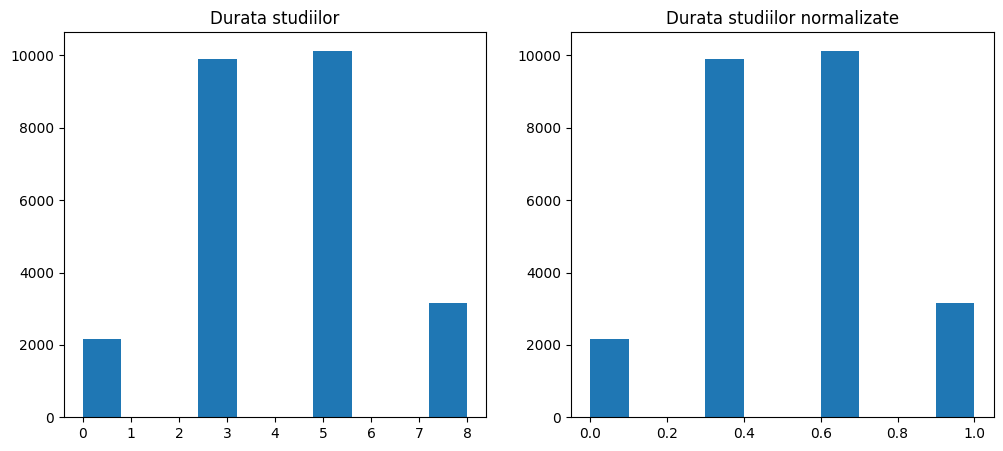

In [37]:
dict_durata = {
    'Bachelor’s degree' : 3,
    'Doctoral degree' : 8,
    'Master’s degree' : 5,
    'Professional doctorate' : 8,
    'No formal education past high school' : 0,
    'I prefer not to answer' : -1,
    'Some college/university study without earning a bachelor’s degree' : 0
}

durate = data['Q4'][1:].map(dict_durata).to_list()
durate = [x for x in durate if x != -1]
minDurata = min(durate)
maxDurata = max(durate)

durateNormalizate = [ (x - minDurata) / (maxDurata - minDurata) for x in durate]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(durate, bins=10)
axs[0].set_title('Durata studiilor')

axs[1].hist(durateNormalizate, bins=10)
axs[1].set_title('Durata studiilor normalizate')

plt.show()

vechimea in programare

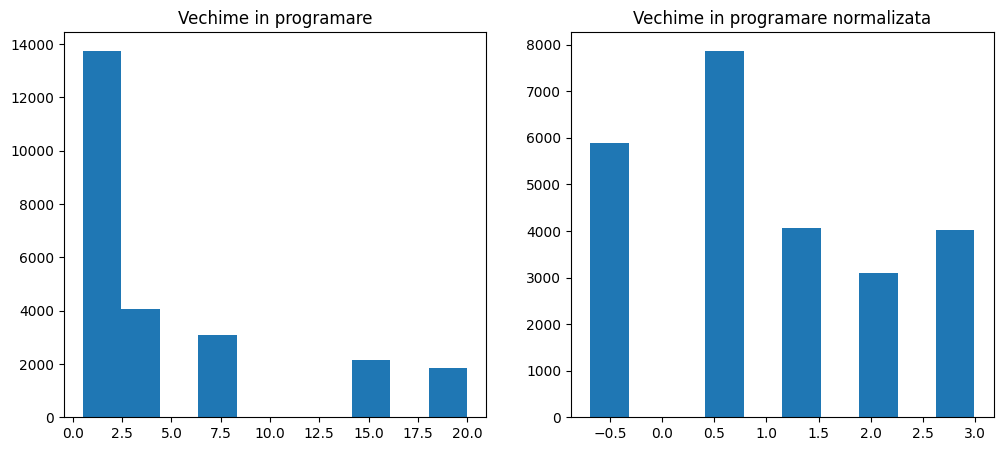

In [38]:
dict_vechime = {
    '< 1 years' : 0.5,
    '1-3 years' : 2,
    '3-5 years' : 4,
    '5-10 years' : 7.5,
    '10-20 years' : 15,
    '20+ years' : 20,
    'I have never written code' : 0
}

vechime = data['Q6'][1:].map(dict_vechime).to_list()

vechime = [x for x in vechime if x != 0]
vechimeNormalizate = [ log(x) for x in vechime]

fig2, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(vechime, bins=10)
axs[0].set_title('Vechime in programare')

axs[1].hist(vechimeNormalizate, bins=10)
axs[1].set_title('Vechime in programare normalizata')

plt.show()

problema 2 - valorile pixelilor din imagini

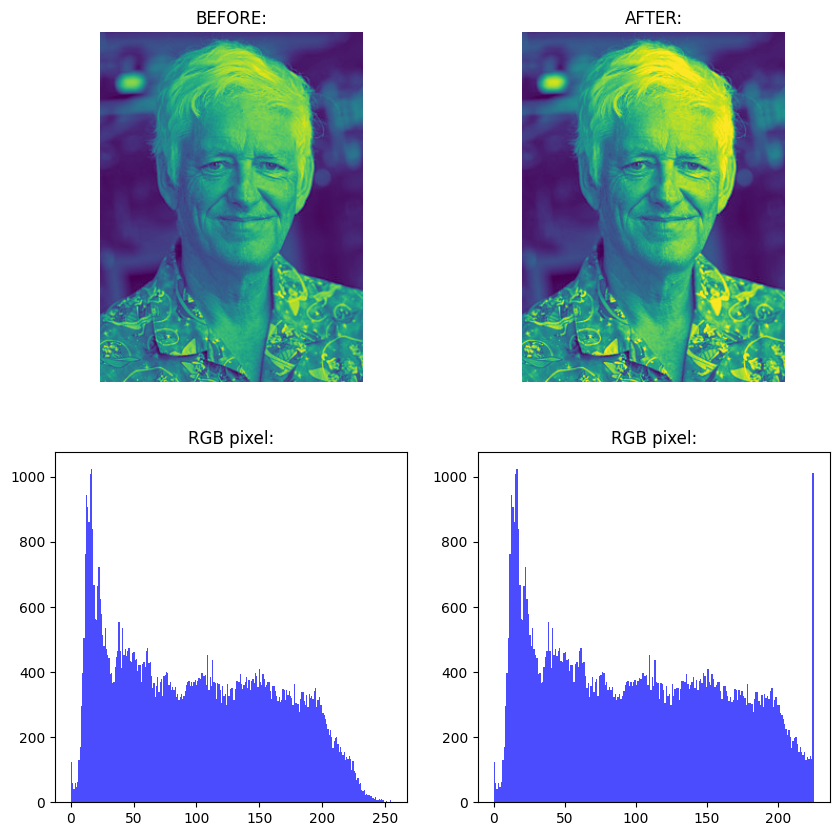

In [40]:
image = Image.open('images/Norvig.jpg').convert('L')

Pixeli = list(image.getdata())

PixeliNorm = [ rp if rp <= 225 else 225 for rp in Pixeli]

new_image = Image.new('L', image.size)
new_image.putdata(PixeliNorm)

fig6, axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].imshow(image)
axes[0,0].set_title('BEFORE:')
axes[0,0].axis('off')

axes[1,0].hist(Pixeli, bins=256, color='blue', alpha=0.7)
axes[1,0].set_title('RGB pixel:')
axes[1,0].axis('on')

axes[0,1].imshow(new_image)
axes[0,1].set_title('AFTER:')
axes[0,1].axis('off')

axes[1,1].hist(PixeliNorm, bins=225, color='blue', alpha=0.7)
axes[1,1].set_title('RGB pixel:')
axes[1,1].axis('on')

plt.show()

problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.

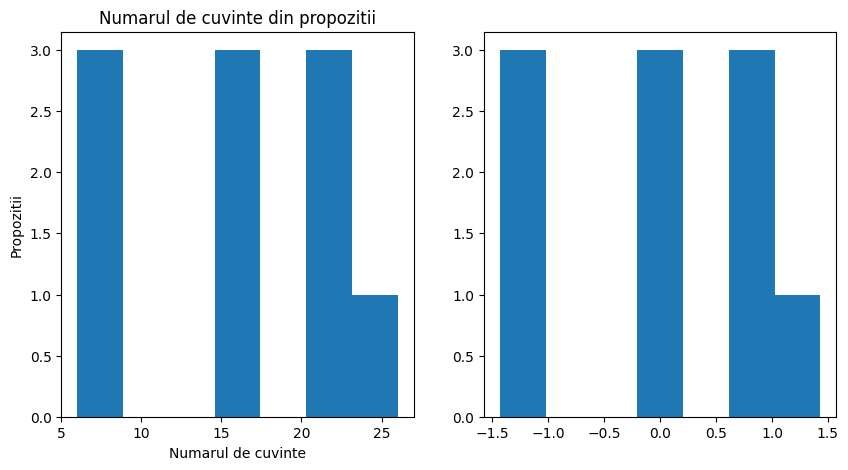

In [36]:
numere = []
for propozitie in propozitii:
    cuvinte_propozitie = nltk.RegexpTokenizer(r'\w+').tokenize(propozitie)
    numere.append(len(cuvinte_propozitie))

niu = numpy.mean(numere)
sigma = numpy.std(numere)

numereNormalizate = [ (x-niu)/sigma for x in numere]

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(numere, bins=len(set(numere)) )
ax[0].set_title('Numarul de cuvinte din propozitii')
ax[0].set_xlabel('Numarul de cuvinte')
ax[0].set_ylabel('Propozitii')

ax[1].hist(numereNormalizate, bins=len(set(numereNormalizate)) )

plt.show()